<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C09/C09_Script01_IntroMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filosofía de `matplotlib`
- Histórica: Fue pensado para ser una alternativa a MATLAB en Python.
- El problema del renderizado.

Matplotlib nación con una "doble personalidad" para satisfacer a ambos mundos (el mundo que ya usaba matlab y el que provenía eminentemente de python)

- El submódulo pyplot `import matplotlib.pyplot as plt`
- La capa orientada a objetos.

El problema del renderizado: **Separación de responsabilidades**
- El desafío de la abstracción.
- Desacoplamiento Frontend/Backend.
  - **El fontend (El qué)**: Viven (básicamente) los objetos lógico: `Figure` y `Axes`.
  - **El Backend (El como)**: Toma las instrucciones lógicas del frontend y las traduce a llamadas específicas del dispositivo de salida.
  


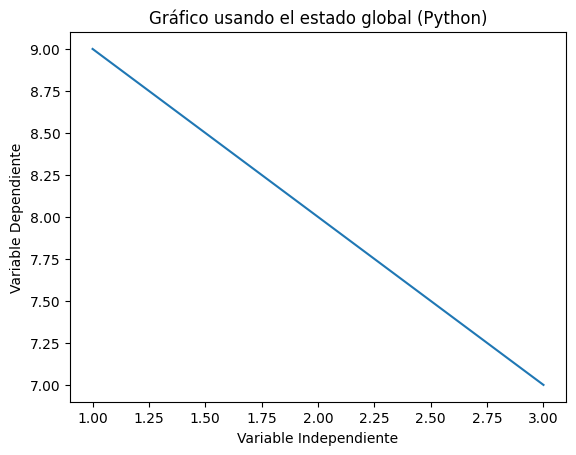

In [1]:
# Inicios del 2000
import matplotlib.pyplot as plt

plt.plot([1,2,3],[9,8,7])
plt.title("Gráfico usando el estado global (Python)")
plt.xlabel("Variable Independiente")
plt.ylabel("Variable Dependiente")

# Fin
plt.show()

In [3]:
# Capa orientada a objetos (La arquitectura real)
from matplotlib.figure import Figure

# Crea la ventana
fig = Figure(figsize = (5,4))

# Crea los ejes
ax = fig.add_subplot(1,1,1)

# Crea el diagrama de línea
ax.plot([1,2,3],[9,8,7])

# Título
ax.set_title("Gráfico con la API orientada a objetos")

fig.savefig("primer_ejemplito.png")

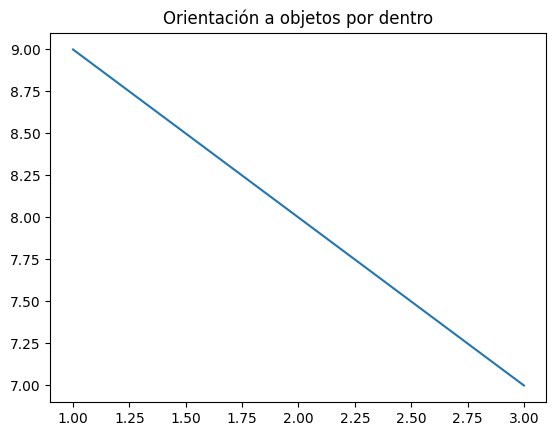

In [6]:
# Demostremos que pyplot es simplemente un envoltorio (wrapper) del estido orientado
# a objetos (oo) de matplotlib

import matplotlib.pyplot as plt

# De manera automática pyplot crea la figura (ventana) y los ejes
plt.figure()
plt.plot([1,2,3],[9,8,7])

# POdemos recuperar que pyplot estaba manejando
fig = plt.gcf()
ax = plt.gca()

# Título
plt.title("Pyplot por fuera")

# Título
ax.set_title("Orientación a objetos por dentro")

# Fin
plt.show()

In [7]:
# Capa orientada a objetos (La arquitectura real)
from matplotlib.figure import Figure

# Crea la ventana
fig = Figure(figsize = (5,4))

# Crea los ejes
ax = fig.add_subplot(1,1,1)

# Crea el diagrama de línea
ax.plot([1,2,3],[9,8,7])

# Título
ax.set_title("Gráfico con la API orientada a objetos")

# Salida como png (raster)
fig.savefig("primer_ejemplito2.png")

# Salida como pdf (vectorial)
fig.savefig("grafico1.pdf")

# La arquitectura de tres capas

- Capa Backend (Base)
  - Es el motor físico: Maneja el lienzo (`Canvas`) y el renderizado (`Renderer`)
    - Motores interactivos: `Qt`, `GTK`, `Tk`, `MacOsX`
    - Motores no interactivos: `Agg`, `SVG`, `PDF`

- Capa Artist (Núcleo)
  - Aquí es donde vive el gráfico. Si lo puedes ver, es un `Artist`.
  - Maneja los objetos lógicos: Títulos, etiquetas, imágenes, líneas.

- Capa Scripting (`matplotlib.pyplot`)

In [5]:
# ¿Quién  está pintando nuestras figuras?
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [12]:
# Vamos a forzar el uso de un motor no interactivo (Agg: Anti-Grain Geometry)

# Creación de datos
import numpy as np

# Forcemos el backend no interactivo
matplotlib.use("Agg")
import matplotlib.pyplot as plt

print("Backend actual: ", matplotlib.get_backend())

# Función de activación sigmoidea
x = np.linspace(-10, 10, 1000)
y = 1/(1+np.exp(-x))

# Graficar
fig, ax = plt.subplots()
ax.plot(x,y, color = "blue", label = r'$sigma(x) = \frac{1}{1+e^{-x}}$')
ax.set_title("Función de activación (Backend: Agg)")
ax.legend()

# Guardar en disco duro
fig.savefig("funcion_sigmoidea.png")

# Fin
# plt.show()
# No muestra la imagen generada por el backend que está usando

# Limpieza de memoria crítica en servidores (aplicaciones doker)
plt.close(fig)


Backend actual:  Agg


In [6]:
# Veamos cómo cambiar de un Backend no interactivo (Agg) a un Backend interactivo (QtAgg)

try:
    matplotlib.use("TkAgg") # Otra opción: QtAgg
    import matplotlib.pyplot as plt
except:
    print("El Backend no se encuentra disponible")

# Comunicamos el cambio de Backend
print("Backend cambiado: ", matplotlib.get_backend())

El Backend no se encuentra disponible
Backend cambiado:  module://matplotlib_inline.backend_inline


In [ ]:
# Hay que desconectrar la instancia de GOOGLE COMPUTE ENGINNE y conectarse de nuevo

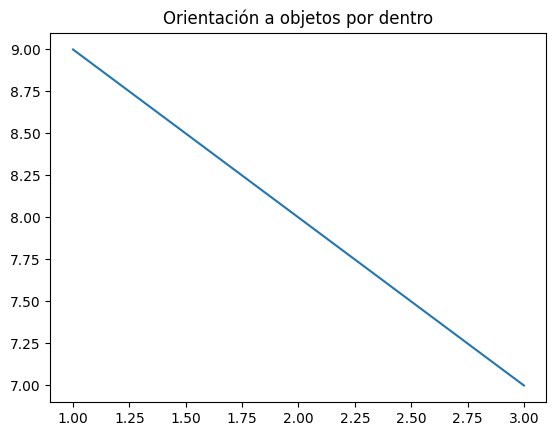

In [7]:
import matplotlib.pyplot as plt

# De manera automática pyplot crea la figura (ventana) y los ejes
plt.figure()
plt.plot([1,2,3],[9,8,7])

# POdemos recuperar que pyplot estaba manejando
fig = plt.gcf()
ax = plt.gca()

# Título
plt.title("Pyplot por fuera")

# Título
ax.set_title("Orientación a objetos por dentro")

# Fin
plt.show()

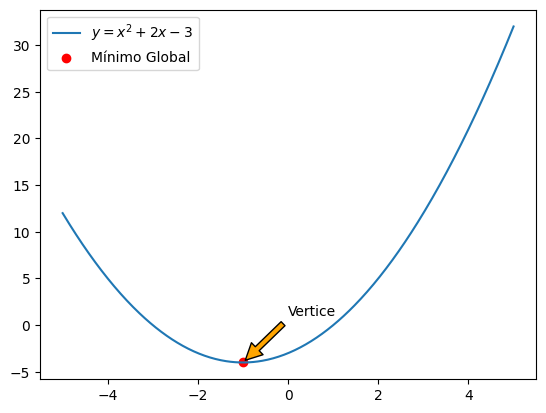

In [13]:
# Parábola y optimización (Cálculo)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,500)
y = x**2 + 2*x - 3
min_x, min_y = -1, -4 # Vértice

# Graficar
fig, ax = plt.subplots()
ax.plot(x,y, label = r'$y = x^2 + 2x - 3$')
ax.scatter([min_x], [min_y], color = "red", label = "Mínimo Global")
ax.legend()

# Agreguemos una anotación para el vértice
ax.annotate("Vertice", xy = (min_x, min_y), xytext = (min_x+1, min_y+5),
            arrowprops= dict(facecolor = "orange", shrink = 0.05))

# Guardar en disco duro
plt.savefig("minimo_global_cuadratica.png")

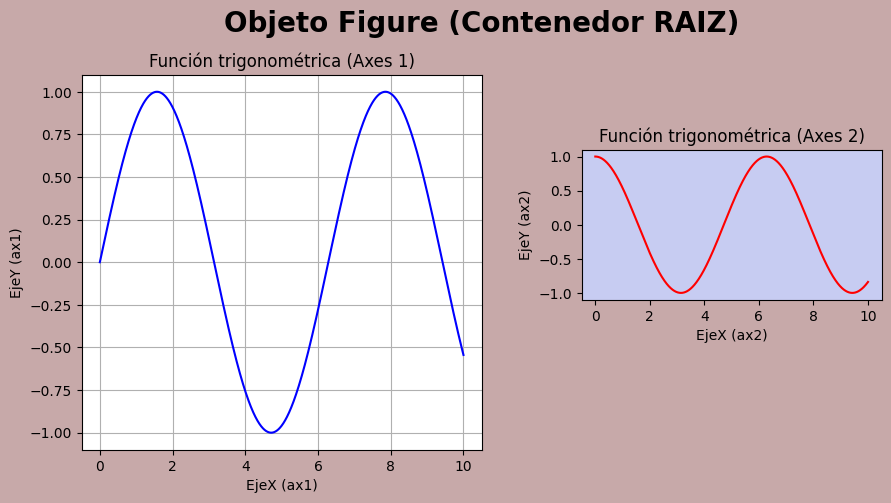

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos el contenedor raíz: el papel
fig = plt.figure(figsize=(10,5), facecolor="#C7A9A9")
fig.suptitle("Objeto Figure (Contenedor RAIZ)", fontsize = 20, fontweight = "bold")

# Agreguemos dos Axes (Gráficos) a la figura (fig) manualmente
# add_axes([left, bottom, width, heitght]) en coordenadas relativas (0 a 1)

# Gráfico principal (Izquierda)
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.75])
# Gráfico Secundario (Derecha)
ax2 = fig.add_axes([0.6, 0.4, 0.3, 0.3])

# Lógica del dibujo (Capa Artist)
# Dominio
x = np.linspace(0,10,1200)
# Configurando ax1
ax1.plot(x, np.sin(x), color = "blue")
ax1.set_title("Función trigonométrica (Axes 1)")
ax1.set_xlabel("EjeX (ax1)")
ax1.set_ylabel("EjeY (ax1)")
ax1.grid(True)

# Configurando ax2
ax2.plot(x, np.cos(x), color = "red")
ax2.set_title("Función trigonométrica (Axes 2)")
ax2.set_xlabel("EjeX (ax2)")
ax2.set_ylabel("EjeY (ax2)")
ax2.set_facecolor("#C7CCF2")

# Fin
plt.show()

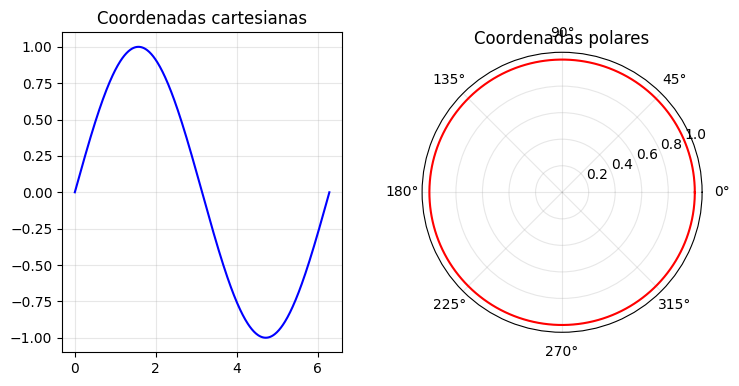

In [30]:
# Consideremos un Axes en coordenadas cartesianas y el otro en coordenadas polares
fig = plt.figure(figsize=(8,4))

# Agregar dos ejes
ax_cart = fig.add_axes([0.1,0.1, 0.35, 0.8])
ax_polar = fig.add_axes([0.55, 0.1, 0.35, 0.8], projection="polar")

# Definamos el dominio (ángulo en coordenadas polares)
theta = np.linspace(0,2*np.pi, 500)

# Coordenadas cartesianas
ax_cart.plot(theta, np.sin(theta), color = "blue")
ax_cart.set_title("Coordenadas cartesianas")
ax_cart.grid(True, alpha = 0.3)

# Coordenadas polares
ax_polar.plot(theta, np.ones_like(theta), color = "red")
ax_polar.set_title("Coordenadas polares")
ax_polar.grid(True, alpha = 0.3)

# Fin
plt.show()


# El sistema de coordenadas y Transformaciones (Afines)
$$
X_{display} = T(X_{data})
$$

Hemos visto los 4 sistemas de coordenadas
- Data Coordinate System (`ax.transData`)
- Axes Coordinate System (`ax.transAxes`)
- Figure Coordinate System (`fig.transFigure`)
- Display (píxeles puros)

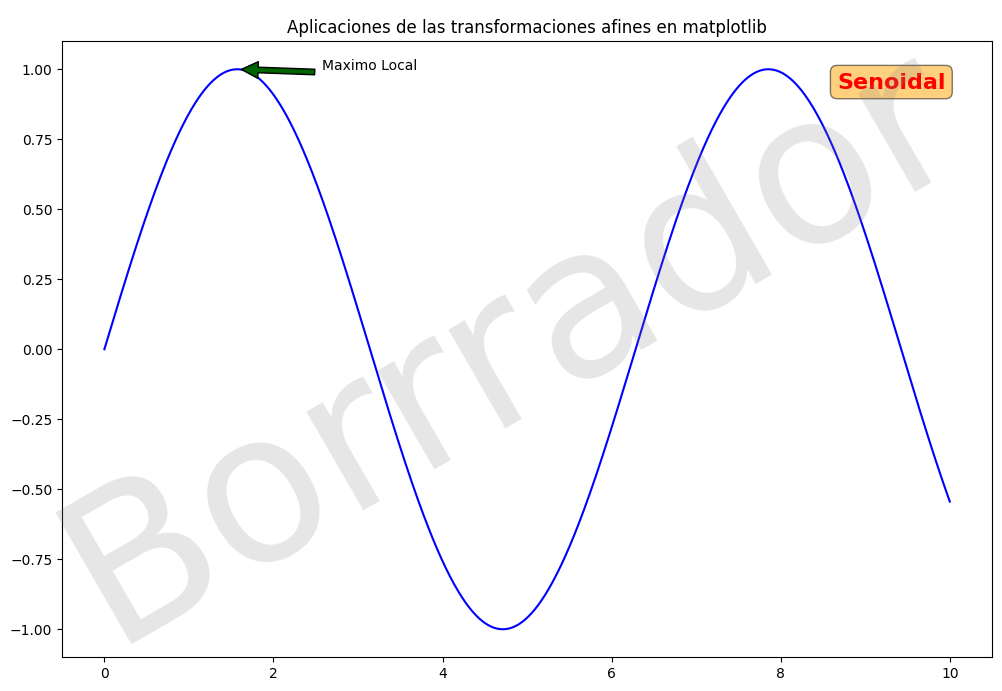

In [57]:
from matplotlib.patches import BoxStyle
from matplotlib import transforms
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0,10,600)
y = np.sin(x)

# Ventana y axes
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, color = "blue", label = "Señal Teórica")

# Vamos a etiquetar un pico de la función
# Coordenadas de datos (as.transData)
peak_x, peak_y = np.pi/2, 1
ax.annotate("Maximo Local",
            xy = (peak_x, peak_y),
            xytext=(peak_x + 1, peak_y),
            arrowprops = dict(facecolor = "darkgreen", shrink = 0.05),
            transform = ax.transData
            )

# Vamos a colocar una etiqueta que siempre esté en la esquina superior derecha
# Coordenadas de Axes: ax.trasnAxes
ax.text(0.95, 0.95, "Senoidal",
        verticalalignment = "top",
        horizontalalignment = "right",
        transform = ax.transAxes, # ← Este es la clave
        color = "red",
        fontsize = 16,
        fontweight = "bold",
        # Coloquemos el texto dentro de una caja
        bbox = dict(facecolor = "orange", alpha = 0.5, boxstyle = "round")
        )

# Una marca de agua que cruza todo el texto
# Coordenadas de figure (fig.transFigure)
fig.text(0.5,0.5, "Borrrador",
         fontsize = 150,
         color = "gray",
         alpha = 0.2,
         va = "center",
         ha = "center",
         rotation= 30,
         transform = fig.transFigure) # ← Este es la clave

# Agreguemos un título
ax.set_title("Aplicaciones de las transformaciones afines en matplotlib")

# Fin
plt.show()